In [1]:
# Import libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
df = pd.read_csv('/Users/Karandeep/Downloads/archive (6)/world_population.csv')

In [3]:
# View first 5 rows of the dataset
df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [4]:
# Grab information regarding dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [5]:
# Check our dataset for duplicated data
df.duplicated().sum()

0

In [6]:
# Find unique values in data
df.nunique()

Rank                           234
CCA3                           234
Country                        234
Capital                        234
Continent                        6
2022 Population                234
2020 Population                234
2015 Population                234
2010 Population                234
2000 Population                234
1990 Population                234
1980 Population                234
1970 Population                234
Area (km²)                     233
Density (per km²)              234
Growth Rate                    180
World Population Percentage     70
dtype: int64

In [7]:
# Number of countries in each continent
df['Continent'].value_counts()

Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: Continent, dtype: int64

Text(84.25, 0.5, 'Number of Countries')

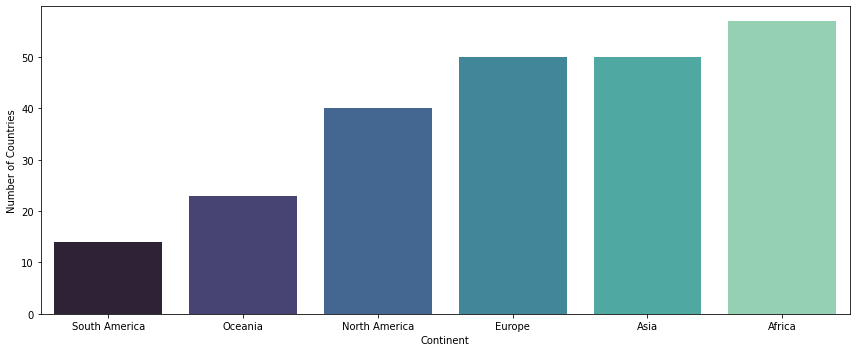

In [8]:
plt.figure(figsize=(12,5))
sns.countplot(x='Continent',data = df.sort_values(by = 'Continent', ascending = False), palette = 'mako')
plt.tight_layout()
plt.xlabel('Continent')
plt.ylabel('Number of Countries')

In [9]:
# World Population Percentage of Each Continent
cont_percentage = df.groupby('Continent')['World Population Percentage'].sum().round(1).sort_values(ascending=False).reset_index()
cont_percentage

,Continent,World Population Percentage
0,Asia,59.2
1,Africa,17.9
2,Europe,9.3
3,North America,7.5
4,South America,5.5
5,Oceania,0.6


In [10]:
# Creating variables containing information I will be using later on
labels = cont_percentage['Continent']
pp = cont_percentage['World Population Percentage']

In [11]:
labels

0             Asia
1           Africa
2           Europe
3    North America
4    South America
5          Oceania
Name: Continent, dtype: object

In [12]:
pp

0    59.2
1    17.9
2     9.3
3     7.5
4     5.5
5     0.6
Name: World Population Percentage, dtype: float64

Text(0.5, 1.0, 'World Population Percentage per Continent')

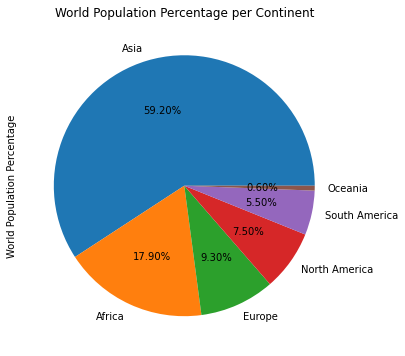

In [13]:
pp.plot.pie(labels = labels,autopct = '%1.2f%%', figsize = (12,6),shadow = False)
plt.title('World Population Percentage per Continent')

In [14]:
# Finding the population difference between 1970 and 2022 for each continent
df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [15]:
pp_70_to_22 = df.groupby('Continent')['1970 Population','2022 Population'].sum().sort_values(by='Continent',ascending = False).reset_index()
pp_70_to_22

/var/folders/mc/4gd9wld50ns1vjc6g4vp41500000gn/T/ipykernel_86953/3588283705.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pp_70_to_22 = df.groupby('Continent')['1970 Population','2022 Population'].sum().sort_values(by='Continent',ascending = False).reset_index()


,Continent,1970 Population,2022 Population
0,South America,192947156,436816608
1,Oceania,19480270,45038554
2,North America,315434606,600296136
3,Europe,655923991,743147538
4,Asia,2144906290,4721383274
5,Africa,365444348,1426730932


In [16]:
pp_70_to_22['Percent Growth'] = round((pp_70_to_22['1970 Population']/pp_70_to_22['2022 Population'])*100,2)
pp_70_to_22.sort_values('Percent Growth',ascending=False)

,Continent,1970 Population,2022 Population,Percent Growth
3,Europe,655923991,743147538,88.26
2,North America,315434606,600296136,52.55
4,Asia,2144906290,4721383274,45.43
0,South America,192947156,436816608,44.17
1,Oceania,19480270,45038554,43.25
5,Africa,365444348,1426730932,25.61


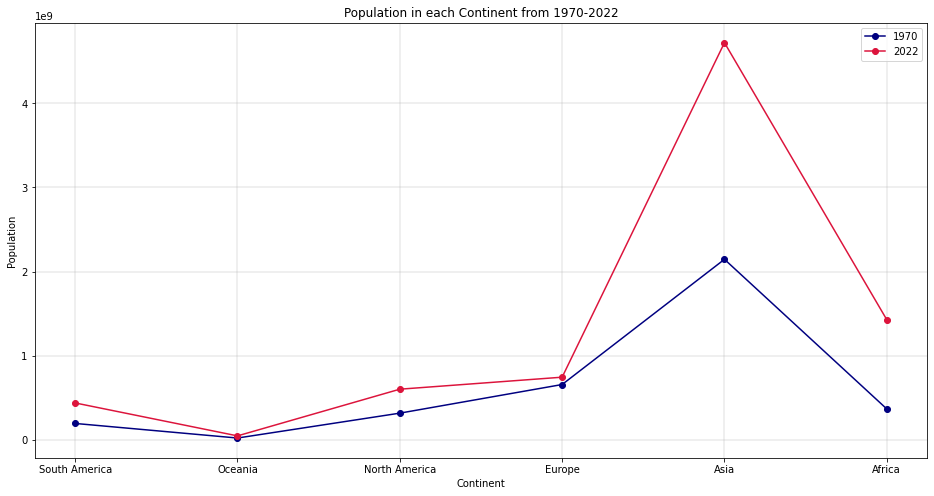

In [17]:
plt.figure(figsize =(16,8))
plt.plot(pp_70_to_22['Continent'],pp_70_to_22['1970 Population'], label='1970',color='navy',marker='o')
plt.plot(pp_70_to_22['Continent'],pp_70_to_22['2022 Population'], label='2022',color='crimson',marker='o')
plt.title('Population in each Continent from 1970-2022')
plt.xlabel('Continent')
plt.ylabel('Population')
plt.grid(linewidth = 0.4)
plt.legend()

In [18]:
# As we can see above, the largest population differences over the years has occured in Asia and Africa.

In [19]:
# Looking at countries next, first I'll look at the most populated countries (limit to 10)

In [28]:
top_10_pop = df[['Country','2022 Population']].sort_values(by = '2022 Population',ascending=False).head(10).reset_index()

In [29]:
top_10_pop

,index,Country,2022 Population
0,41,China,1425887337
1,92,India,1417173173
2,221,United States,338289857
3,93,Indonesia,275501339
4,156,Pakistan,235824862
5,149,Nigeria,218541212
6,27,Brazil,215313498
7,16,Bangladesh,171186372
8,171,Russia,144713314
9,131,Mexico,127504125


In [30]:
top_10_pop.drop(columns='index',inplace=True)

In [31]:
top_10_pop

,Country,2022 Population
0,China,1425887337
1,India,1417173173
2,United States,338289857
3,Indonesia,275501339
4,Pakistan,235824862
5,Nigeria,218541212
6,Brazil,215313498
7,Bangladesh,171186372
8,Russia,144713314
9,Mexico,127504125


In [36]:
# Can create a function to find top 5 countries in each continent
def top_5_coun_con(Continent):
    cont = df[df['Continent'] == Continent]
    return cont.groupby('Country')['2022 Population'].sum().sort_values(ascending=False).head(5)

In [37]:
top_5_coun_con('Asia')

Country
China         1425887337
India         1417173173
Indonesia      275501339
Pakistan       235824862
Bangladesh     171186372
Name: 2022 Population, dtype: int64

In [38]:
top_5_coun_con('Europe')

Country
Russia            144713314
Germany            83369843
United Kingdom     67508936
France             64626628
Italy              59037474
Name: 2022 Population, dtype: int64

In [39]:
top_5_coun_con('South America')

Country
Brazil       215313498
Colombia      51874024
Argentina     45510318
Peru          34049588
Venezuela     28301696
Name: 2022 Population, dtype: int64

In [40]:
top_5_coun_con('North America')

Country
United States    338289857
Mexico           127504125
Canada            38454327
Guatemala         17843908
Haiti             11584996
Name: 2022 Population, dtype: int64

In [41]:
top_5_coun_con('Africa')

Country
Nigeria     218541212
Ethiopia    123379924
Egypt       110990103
DR Congo     99010212
Tanzania     65497748
Name: 2022 Population, dtype: int64

In [42]:
top_5_coun_con('Oceania')

Country
Australia           26177413
Papua New Guinea    10142619
New Zealand          5185288
Fiji                  929766
Solomon Islands       724273
Name: 2022 Population, dtype: int64

In [43]:
#Create a function to extract the least populated countries per continent (limit 5)
def bot_5_coun_con(Continent):
    cont = df[df['Continent'] == Continent]
    return cont.groupby('Country')['2022 Population'].sum().sort_values(ascending=True).head(5)

In [44]:
bot_5_coun_con('Asia')

Country
Brunei          449002
Maldives        523787
Macau           695168
Bhutan          782455
Timor-Leste    1341296
Name: 2022 Population, dtype: int64

In [45]:
bot_5_coun_con('Europe')

Country
Vatican City       510
Gibraltar        32649
San Marino       33660
Monaco           36469
Liechtenstein    39327
Name: 2022 Population, dtype: int64

In [46]:
bot_5_coun_con('South America')

Country
Falkland Islands       3780
French Guiana        304557
Suriname             618040
Guyana               808726
Uruguay             3422794
Name: 2022 Population, dtype: int64

In [47]:
bot_5_coun_con('North America')

Country
Montserrat                    4390
Saint Pierre and Miquelon     5862
Saint Barthelemy             10967
Anguilla                     15857
British Virgin Islands       31305
Name: 2022 Population, dtype: int64

In [48]:
bot_5_coun_con('Africa')

Country
Seychelles               107118
Sao Tome and Principe    227380
Mayotte                  326101
Western Sahara           575986
Cape Verde               593149
Name: 2022 Population, dtype: int64

In [49]:
bot_5_coun_con('Oceania')

Country
Tokelau               1871
Niue                  1934
Tuvalu               11312
Wallis and Futuna    11572
Nauru                12668
Name: 2022 Population, dtype: int64

In [50]:
# Will check countries with the highest growth rate

In [51]:
top_10_growth = df.sort_values(by='Growth Rate',ascending=False).head(10)

In [52]:
top_10_growth

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
133,135,MDA,Moldova,Chisinau,Europe,3272996,3084847,3277388,3678186,4251573,4480199,4103240,3711140,33846,96.7026,1.0691,0.04
164,37,POL,Poland,Warsaw,Europe,39857145,38428366,38553146,38597353,38504431,38064255,35521429,32482943,312679,127.4698,1.0404,0.50
148,54,NER,Niger,Niamey,Africa,26207977,24333639,20128124,16647543,11622665,8370647,6173177,4669708,1267000,20.6851,1.0378,0.33
202,60,SYR,Syria,Damascus,Asia,22125249,20772595,19205178,22337563,16307654,12408996,8898954,6319199,185180,119.4797,1.0376,0.28
189,116,SVK,Slovakia,Bratislava,Europe,5643453,5456681,5424444,5396424,5376690,5261305,4973883,4522867,49037,115.0856,1.0359,0.07
55,15,COD,DR Congo,Kinshasa,Africa,99010212,92853164,78656904,66391257,48616317,35987541,26708686,20151733,2344858,42.2244,1.0325,1.24
130,182,MYT,Mayotte,Mamoudzou,Africa,326101,305587,249545,211786,159215,92659,52233,35383,374,871.9278,1.0319,0.00
39,69,TCD,Chad,N'Djamena,Africa,17723315,16644701,14140274,11894727,8259137,5827069,4408230,3667394,1284000,13.8032,1.0316,0.22
5,42,AGO,Angola,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,1.0315,0.45
124,59,MLI,Mali,Bamako,Africa,22593590,21224040,18112907,15529181,11239101,8945026,7372581,6153587,1240192,18.2178,1.0314,0.28


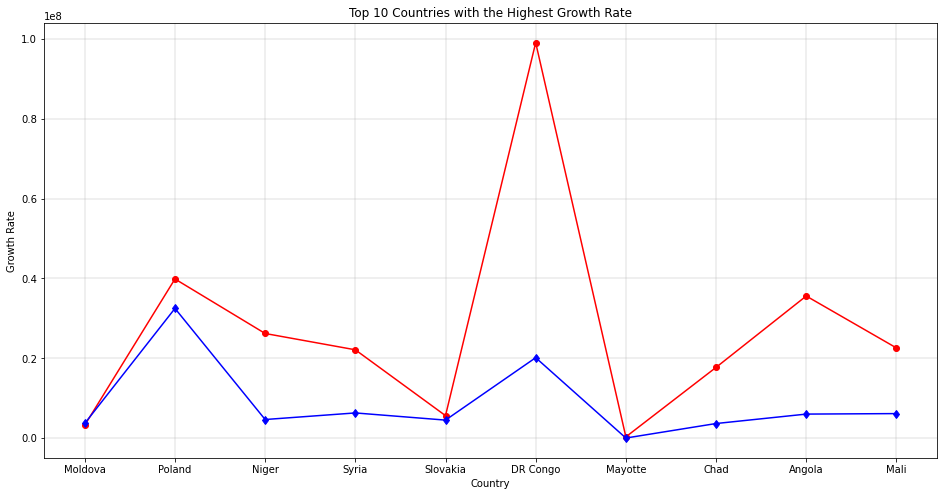

In [55]:
plt.figure(figsize=(16,8))
plt.plot(top_10_growth['Country'],top_10_growth['2022 Population'],marker = 'o', label = '2022',color = 'red')
plt.plot(top_10_growth['Country'],top_10_growth['1970 Population'],marker = 'd', label = '1970',color = 'blue')
plt.xlabel('Country')
plt.ylabel('Growth Rate')
plt.title('Top 10 Countries with the Highest Growth Rate')
plt.grid(linewidth=0.4)

In [56]:
# Countries with the highest population as of 2022
top_10_population = df.groupby('Country')['2022 Population'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_population

,Country,2022 Population
0,China,1425887337
1,India,1417173173
2,United States,338289857
3,Indonesia,275501339
4,Pakistan,235824862
5,Nigeria,218541212
6,Brazil,215313498
7,Bangladesh,171186372
8,Russia,144713314
9,Mexico,127504125


Text(0.5, 1.0, 'Top 10 Countries with the Highest Population as of 2022')

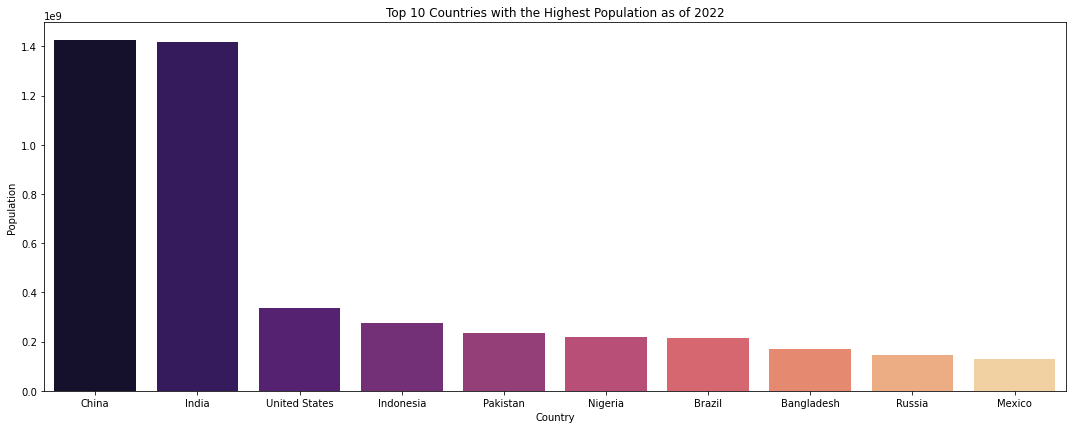

In [57]:
plt.figure(figsize=(15,6))
sns.barplot(x='Country',y='2022 Population',data = top_10_population,palette='magma')
plt.tight_layout()
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Top 10 Countries with the Highest Population as of 2022')

In [59]:
# Let's see if there is a strong correlation between any variables

In [61]:
df.head(3)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56


In [64]:
area_worldpop_corr = df['Area (km²)'].corr(df['World Population Percentage'])
area_worldpop_corr

0.45328362715256165

<AxesSubplot:>

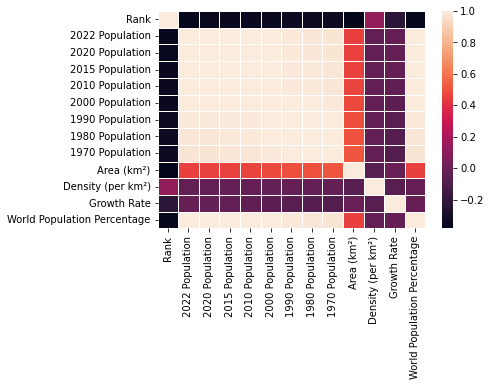

In [74]:
corr = df.corr()
sns.heatmap(corr, annot = False, linewidths =0.5)

In [81]:
corr_matrix = df.corr().round(3)
corr_matrix

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.000,-0.358,-0.356,-0.351,-0.347,-0.341,-0.336,-0.335,-0.335,-0.384,0.129,-0.225,-0.358
2022 Population,-0.358,1.000,1.000,0.999,0.999,0.995,0.987,0.980,0.973,0.453,-0.028,-0.021,1.000
2020 Population,-0.356,1.000,1.000,1.000,0.999,0.996,0.989,0.982,0.975,0.455,-0.027,-0.025,1.000
2015 Population,-0.351,0.999,1.000,1.000,1.000,0.997,0.992,0.986,0.979,0.458,-0.027,-0.032,0.999
2010 Population,-0.347,0.999,0.999,1.000,1.000,0.999,0.994,0.989,0.983,0.462,-0.027,-0.038,0.999
2000 Population,-0.341,0.995,0.996,0.997,0.999,1.000,0.998,0.995,0.991,0.474,-0.026,-0.051,0.995
1990 Population,-0.336,0.987,0.989,0.992,0.994,0.998,1.000,0.999,0.997,0.487,-0.026,-0.062,0.987
1980 Population,-0.335,0.980,0.982,0.986,0.989,0.995,0.999,1.000,0.999,0.498,-0.027,-0.072,0.980
1970 Population,-0.335,0.973,0.975,0.979,0.983,0.991,0.997,0.999,1.000,0.510,-0.027,-0.081,0.973
Area (km²),-0.384,0.453,0.455,0.458,0.462,0.474,0.487,0.498,0.510,1.000,-0.063,-0.014,0.453


From the correlation matrix above, we can conclude that the only possible correlation is between the Area of a country
and it's population. The correlation ranges between the positive values 0.453 and 0.510 depending on the year. The
correlation between Area and population seems to be decreasing over time. In 1970, the correlation is 0.510 and this
decreases over time, where finally in 2022 it's 0.453.